In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Two Body Orbit

For two bodies of mass $m_1$ and $m_2$, the lagrangian for this system is described by

$\begin{align}
 \mathcal{L} = \frac12 m_1\Big[\frac{dx_1}{dt}^2+\frac{dy_1}{dt}^2\Big] + \frac12 m_2\Big[\frac{dx_2}{dt}^2+\frac{dy_2}{dt}^2\Big] + \frac{Gm_1m_2}{r}
\end{align}$

Solving the Euler-Lagrange equation, we arrive at the following system of equations

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot q} = \frac{\partial\mathcal L}{\partial q}
\end{align}$

$\begin{align}
 \:\:\:\:\:\:\:\Big\downarrow
\end{align}$

$\begin{align}
 m_1\ddot x_1 = \frac{-Gm_1m_2(x_1-x_2)}{\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}^3}
 \end{align}$
 
$\begin{align}
 m_1\ddot y_1 = \frac{-Gm_1m_2(y_1-y_2)}{\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}^3}
\end{align}$

$\begin{align}
 m_2\ddot x_2 = \frac{Gm_1m_2(x_1-x_2)}{\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}^3}
 \end{align}$
 
$\begin{align}
 m_2\ddot y_2 = \frac{Gm_1m_2(y_1-y_2)}{\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}^3}
\end{align}$

In [2]:
class DoubleOrbit:
    
    def __init__(self, m1 = 10.0, m2 = 10.0, G = 1.0):
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def dy_dt(self, y, t):
        '''
        This function is the right hand side of the differential equation for
        [dx1/dt, dx1_dot/dt, dx2_dt, dx2_dot/dt, dy1/dt, dy1_dot/dt, dy2_dt, dy2_dot/dt]
        
        y[0] = x1    y[1] = x1_dot
        y[2] = x2    y[3] = x2_dot
        y[4] = y1    y[5] = y1_dot
        y[6] = y2    y[7] = y2_dot
        '''
        
        x1, v_x1, y1, v_y1, x2, v_x2, y2, v_y2 = y.T
        
        r2 = ((x1-x2)**2) + ((y1-y2)**2)
        
        x1dot = v_x1
        y1dot = v_y1
        x2dot = v_x2
        y2dot = v_y2
        
        a_x1 = -self.G*self.m2*(x1-x2)*(r2**(-3/2))
        a_y1 = -self.G*self.m2*(y1-y2)*(r2**(-3/2))
        a_x2 = self.G*self.m1*(x1-x2)*(r2**(-3/2))
        a_y2 = self.G*self.m1*(y1-y2)*(r2**(-3/2))
        
        return x1dot, a_x1, y1dot, a_y1, x2dot, a_x2, y2dot, a_y2
        
    def solve_ode(self, t_pts, x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0):
        '''
        Solve the ODE given the array of time points and initial conditions.
        '''
        y = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0] 
        
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = odeint(self.dy_dt, y, t_pts).T
        
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
        
        

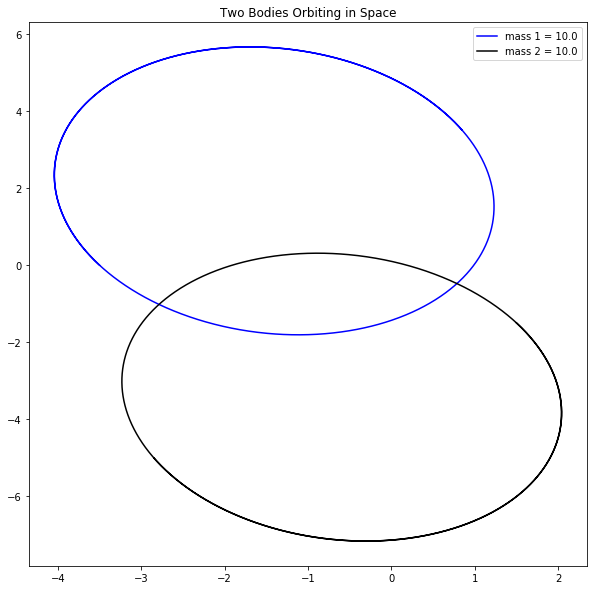

In [3]:
#Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 50.
t_num = 5000
t_pts = np.linspace(t_start, t_end, t_num)

#Create instance of double pendulum
m1 = 10.0
m2 = 10.0
G = 1.0

m1Label = 'mass 1 = ' + str(m1)
m2Label = 'mass 2 = ' + str(m2)

o1 = DoubleOrbit(m1, m2, G)

# Initial conditions specified

x1_0 = -3.5
x1dot_0 = -0.5
y1_0 = 0.0
y1dot_0 = 1.0
x2_0 = 1.5
x2dot_0 = -(m1/m2)*x1dot_0      #Keep the center of mass velocity at 0
y2_0 = -1.5
y2dot_0 = -(m1/m2)*y1dot_0

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0)

plt.figure(figsize=(10, 10))

plt.plot(x1, y1, 'b', label = m1Label)
plt.plot(x2, y2, 'k', label = m2Label)
plt.legend()
plt.title('Two Bodies Orbiting in Space')
plt.show()

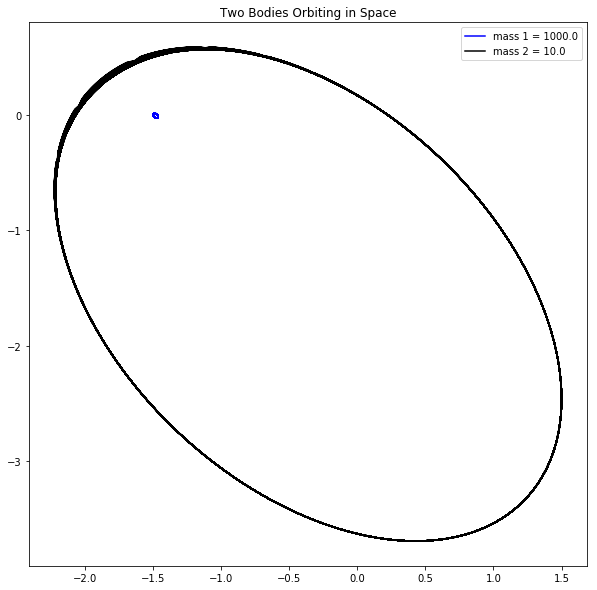

In [4]:
#Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 50.
t_num = 5000
t_pts = np.linspace(t_start, t_end, t_num)

#Create instance of double pendulum
m1 = 1000.0
m2 = 10.0
G = 1.0

m1Label = 'mass 1 = ' + str(m1)
m2Label = 'mass 2 = ' + str(m2)

o1 = DoubleOrbit(m1, m2, G)

# Initial conditions specified

x1_0 = -1.5
x1dot_0 = 0.002
y1_0 = 0.0
y1dot_0 = 0.1
x2_0 = 1.5
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -2.5
y2dot_0 = -(m1/m2)*y1dot_0

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0)

plt.figure(figsize=(10, 10))

plt.plot(x1, y1, 'b', label = m1Label)
plt.plot(x2, y2, 'k', label = m2Label)
plt.legend()
plt.title('Two Bodies Orbiting in Space')
plt.show()

Here, we can see that in the case where one body is much more massive than the other (and the massive body starts with a velocity ~0), the problem reduces to a one body orbit around a massive, stationary point.